<center><h1 style='font-family:consolas'>CSE1015 - Machine Learning Essentials Project</h1><h3 style='font-family:consolas'>Part A) Breast Cancer Classification</h3></center>

<h4 align='right'>Aayush Balaji &emsp;&emsp;&emsp; 20BAI1121<br>Sanjay Saju Jacob &emsp; 20BAI1139<br>Rohita Chakraborty &emsp;20BAI1213<br></h4>

#### Importing all the requisite python libraries.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image

<br>

#### Importing the training and testing datasets by rescaling the RGB pixel values to fall within the 0-1 range.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True, 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)
train_data = train_datagen.flow_from_directory('C:\\Users\\sanja\\archive\\BreaKHis 400X\\train',
                                                 target_size = (244, 244),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

test_datagen = ImageDataGenerator(rescale = 1/255)
test_data = test_datagen.flow_from_directory("C:\\Users\\sanja\\archive\\BreaKHis 400X\\test",
                                                           batch_size=32,
                                                           target_size=(244,244),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)

Found 1148 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


<br>

#### Exploratory analytics for visualizing the frequency of training and testing datasets.

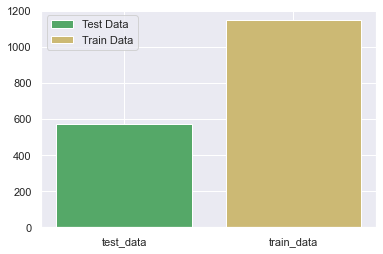

In [ ]:
fig, axis = plt.subplots()
axis.bar("test_data", 572, color='g', label='Test Data')
axis.bar("train_data",1148 , color='y', label='Train Data')
legend = axis.legend()

<br>

#### The heart of the experiment, here we declare the Sequential Model for the Convolutional Network using all the layers - Convolution, Pooling and Dense. On performing the pooling layer, we flatten the input images to a single dimension.

In [ ]:
model = Sequential([
Conv2D(32,kernel_size= 3,padding='valid',activation='relu',input_shape=(244,244,3)),
MaxPooling2D(pool_size=(2,2)),
Conv2D(64,kernel_size= 3,padding='valid',activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Dropout(0.3),
Conv2D(128,kernel_size= 3,padding='valid',activation='relu'),
MaxPooling2D(pool_size=(2,2)),
Dropout(0.2),
Flatten(),
Dense(256,activation='relu'),
Dropout(0.15),
Dense(128,activation='relu'),
Dense(2,activation='softmax')])

<br>

#### Optimizing the model built above using the Adam optimizer to accelerate the gradient descent. We compile the model since only a compiled model can be trained.

In [ ]:
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

<br>

#### Regularizing the model by avoiding the degree of overfitting. Hence during each epoch, the model will prevent going all the way and stop early in an attempt to prevent overfitting.

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

<br>

#### Fitting the training set data onto the Sequential model and performing validation using the data to be used for testing.

In [ ]:
history=model.fit(train_data,
    validation_data = test_data,
    epochs = 30)

Epoch 1/30
36/36 [==============================] - 78s 2s/step - loss: 0.7312 - accuracy: 0.6977 - val_loss: 0.6454 - val_accuracy: 0.6073
Epoch 2/30
36/36 [==============================] - 73s 2s/step - loss: 0.4931 - accuracy: 0.7918 - val_loss: 0.4983 - val_accuracy: 0.8018
Epoch 3/30
36/36 [==============================] - 76s 2s/step - loss: 0.4782 - accuracy: 0.7970 - val_loss: 0.5647 - val_accuracy: 0.7266
Epoch 4/30
36/36 [==============================] - 75s 2s/step - loss: 0.4758 - accuracy: 0.8005 - val_loss: 0.4951 - val_accuracy: 0.8073
Epoch 5/30
36/36 [==============================] - 75s 2s/step - loss: 0.4317 - accuracy: 0.8406 - val_loss: 0.5316 - val_accuracy: 0.7798
Epoch 6/30
36/36 [==============================] - 75s 2s/step - loss: 0.4177 - accuracy: 0.8476 - val_loss: 0.4948 - val_accuracy: 0.8110
Epoch 7/30
36/36 [==============================] - 73s 2s/step - loss: 0.4548 - accuracy: 0.8267 - val_loss: 0.5645 - val_accuracy: 0.7211
Epoch 8/30
36/36 [==

<br>

#### Evaluating the model using the testing data set.

In [ ]:
model.evaluate(test_data)

18/18 [==============================] - 8s 412ms/step - loss: 0.4439 - accuracy: 0.8275


[0.44388625025749207, 0.8275229334831238]

<br>

#### Visualization of the training and validation accuracies as well as losses. This is the Performance Metrics section.

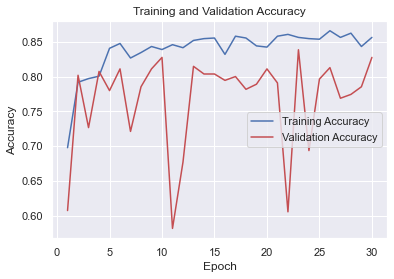

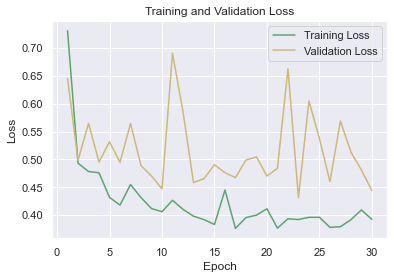

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, accuracy, color='b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, color='r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
plt.plot(epochs, loss, color='g', label='Training Loss')
plt.plot(epochs, val_loss, color='y', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

<br>

#### Finally deploying the model thus trained onto the testing set and predicting the classification results.

In [ ]:
y_predict = model.predict(test_data)
y_predict = np.argmax(y_predict,axis=1)

y_predict

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

<br>

#### Providing an individual image input to check its consistency in predicting the class label.

The given cells are: malignant


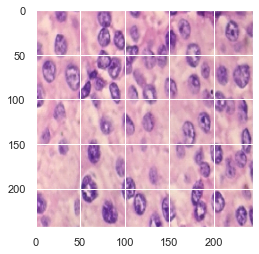

In [ ]:
img_ = image.load_img("C:\\Users\\sanja\\archive\\BreaKHis 400X\\test\\malignant\\SOB_M_DC-14-11031-400-003.png", target_size=(244, 244))
imag = image.img_to_array(img_)
imag = np.expand_dims(imag, axis=0)
pred = model.predict(imag)
pred = np.argmax(pred,axis=1)
print("The given cells are: ", end="")
print(label[pred[0]])
plt.imshow(img_)

<center>----------</center>